In [1]:
import ipywidgets

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import make_blobs, make_moons, make_circles

In [89]:
X, y = make_blobs(100, 4)

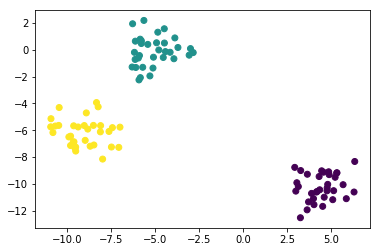

In [20]:
_ = plt.scatter(X[:, 0], X[:, 1], c=y)

In [21]:
X, y = make_moons(50)

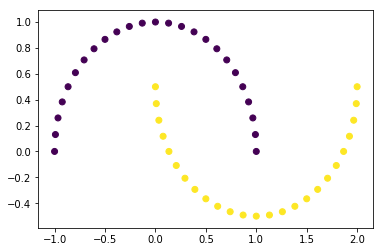

In [22]:
_ = plt.scatter(X[:, 0], X[:, 1], c=y)

In [29]:
xs1 = 5 + 2 * np.random.rand(10)
ys1 = 5 + 2 * np.random.rand(10)

xs2 = 4 + 0.5 * np.random.rand(10)
ys2 = 2 + np.random.rand(10)

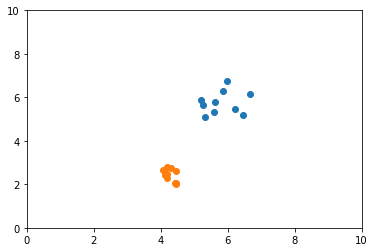

In [34]:
_ = plt.xlim((0, 10))
_ = plt.ylim((0, 10))
_ = plt.scatter(xs1, ys1)
_ = plt.scatter(xs2, ys2)

In [35]:
def merge_clusters(clustering, i, j):
    clustering[i] += clustering[j]
    clustering[j] = []

In [43]:
def remove_empty_clusters(clustering):
    return [x for x in clustering if x != []]

In [44]:
pointwise_distance = lambda x, y : np.linalg.norm(np.array(x) - np.array(y))

In [45]:
def distance_between_clusters(clustering, i, j):
    distance_sum = 0
    for x in clustering[i]:
        for y in clustering[j]:
            distance_sum += pointwise_distance(x, y)
    return distance_sum / (len(clustering[i]) * len(clustering[j]))

In [46]:
def hierarchical_clustering(input_list, k):
    assert k <= len(input_list)
    clustering = [[x] for x in input_list]
    while len(clustering) > k:
        cand_i, cand_j, best_distance = -1, -1, 10**9
        for i in range(len(clustering)-1):
            for j in range(i+1, len(clustering)):
                d = distance_between_clusters(clustering, i, j)
                if d < best_distance:
                    cand_i, cand_j, best_distance = i, j, d
        merge_clusters(clustering, cand_i, cand_j)
        clustering = remove_empty_clusters(clustering)
    return clustering

In [49]:
cluster1 = list(zip(xs1, ys1))
cluster2 = list(zip(xs2, ys2))
all_points = cluster1 + cluster2

In [50]:
np.random.shuffle(all_points)

In [54]:
output = hierarchical_clustering(all_points, 3)

In [56]:
cluster1, cluster2, cluster3 = [np.array(x) for x in output]

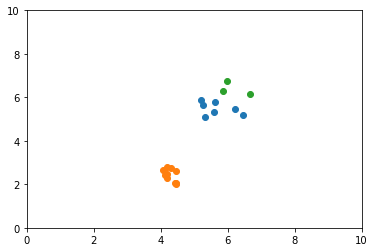

In [57]:
_ = plt.xlim((0, 10))
_ = plt.ylim((0, 10))
_ = plt.scatter(cluster1[:, 0], cluster1[:, 1])
_ = plt.scatter(cluster2[:, 0], cluster2[:, 1])
_ = plt.scatter(cluster3[:, 0], cluster3[:, 1])

In [60]:
output = hierarchical_clustering([tuple(x) for x in X], 2)

In [61]:
cluster1, cluster2 = [np.array(x) for x in output]

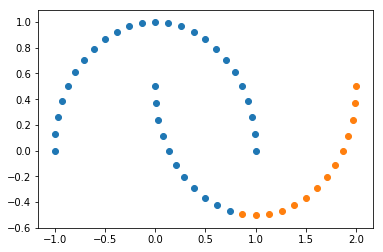

In [63]:
_ = plt.scatter(cluster1[:, 0], cluster1[:, 1])
_ = plt.scatter(cluster2[:, 0], cluster2[:, 1])

In [64]:
from sklearn.cluster import AgglomerativeClustering

In [82]:
c = AgglomerativeClustering(n_clusters=2)

In [83]:
predictions = c.fit_predict(X)

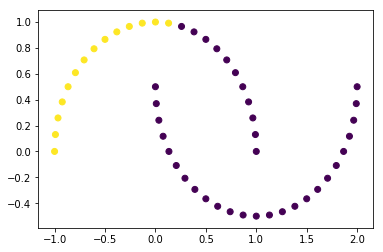

In [84]:
_ = plt.scatter(X[:, 0], X[:, 1], c=predictions)

In [85]:
from sklearn.cluster import KMeans

In [96]:
c = KMeans(n_clusters=4)

In [97]:
predictions = c.fit_predict(X)

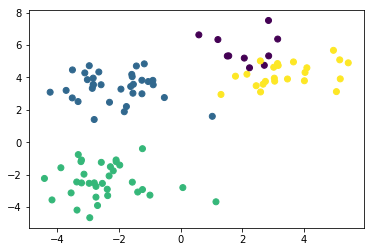

In [98]:
_ = plt.scatter(X[:, 0], X[:, 1], c=predictions)

In [99]:
from sklearn.metrics import silhouette_score